# Breastcancer

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import plotly.express as px

In [2]:
df = pd.read_csv("BreastCancer.csv")

In [3]:
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [4]:
df.Class.value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

<AxesSubplot:>

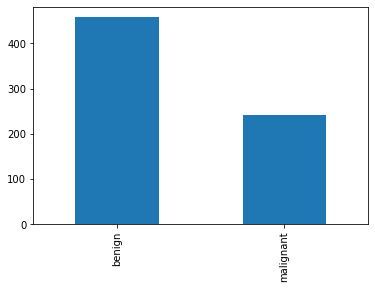

In [5]:
df.Class.value_counts().plot(kind ="bar")

### malignant means patient has cancer, benign means no cancer

In [6]:
df.shape

(699, 12)

### Only Bare.nuclei has null values

In [7]:
df.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [8]:
# Dropping null rows
df = df.dropna()

In [9]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [10]:
df["Bare.nuclei"].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [11]:
df["Bare.nuclei"].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare.nuclei, dtype: int64

In [12]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [13]:
numerical_feature =[feature for feature in df.columns if df[feature].dtype != 'O']

print('number of numerical variables:', len(numerical_feature))

df[numerical_feature].head(20)

number of numerical variables: 11


,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,1,1000025,5,1,1,1,2,1.0,3,1,1
1,2,1002945,5,4,4,5,7,10.0,3,2,1
2,3,1015425,3,1,1,1,2,2.0,3,1,1
3,4,1016277,6,8,8,1,3,4.0,3,7,1
4,5,1017023,4,1,1,3,2,1.0,3,1,1
5,6,1017122,8,10,10,8,7,10.0,9,7,1
6,7,1018099,1,1,1,1,2,10.0,3,1,1
7,8,1018561,2,1,2,1,2,1.0,3,1,1
8,9,1033078,2,1,1,1,2,1.0,1,1,5
9,10,1033078,4,2,1,1,2,1.0,2,1,1


# Dropping Id and Unnamed columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       683 non-null    int64  
 1   Id               683 non-null    int64  
 2   Cl.thickness     683 non-null    int64  
 3   Cell.size        683 non-null    int64  
 4   Cell.shape       683 non-null    int64  
 5   Marg.adhesion    683 non-null    int64  
 6   Epith.c.size     683 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      683 non-null    int64  
 9   Normal.nucleoli  683 non-null    int64  
 10  Mitoses          683 non-null    int64  
 11  Class            683 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 69.4+ KB


In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(df[numeric_cols])
list(imputer.statistics_)
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       683 non-null    float64
 1   Id               683 non-null    float64
 2   Cl.thickness     683 non-null    float64
 3   Cell.size        683 non-null    float64
 4   Cell.shape       683 non-null    float64
 5   Marg.adhesion    683 non-null    float64
 6   Epith.c.size     683 non-null    float64
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      683 non-null    float64
 9   Normal.nucleoli  683 non-null    float64
 10  Mitoses          683 non-null    float64
 11  Class            683 non-null    object 
dtypes: float64(11), object(1)
memory usage: 69.4+ KB


### Checking for Outliers

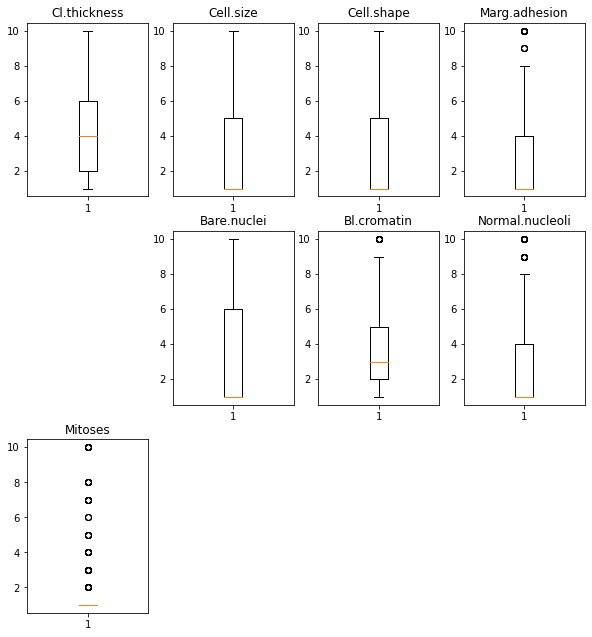

In [17]:
columns = {'Cl.thickness':1,'Cell.size':2,'Cell.shape':3,"Marg.adhesion":4,"Bare.nuclei":6,"Bl.cromatin":7,
         "Normal.nucleoli":8,"Mitoses":9 }
plt.figure(figsize = (10,30))
for var, i in columns.items():
    plt.subplot(8,4,i)
    plt.boxplot(df[var], whis = 1.5)
    plt.title(var)
plt.show()

In [18]:
df.Class.unique()

array(['benign', 'malignant'], dtype=object)

In [19]:
df.Class = df.Class.replace("benign",0)
df.Class = df.Class.replace("malignant",1)


In [20]:
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1.0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,2.0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,4.0,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,5.0,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0


In [21]:
df = df.drop(["Id","Unnamed: 0"], axis =1)

### Building Model

In [22]:
x = df.drop(["Class"], axis = 1)

In [23]:
y = df.Class

In [24]:
df

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns= x.columns)
scaled_data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
df = x

In [27]:
from sklearn import tree

la = [df[["Cl.thickness", "Cell.size", "Cell.shape"]],df[["Marg.adhesion", "Epith.c.size", "Bare.nuclei"]],df[["Normal.nucleoli","Mitoses","Bl.cromatin"]]]
for i in la:
    X_train, X_test,y_train,y_test = train_test_split(i,y, test_size=0.3)
    ka = tree.DecisionTreeRegressor()
    ka = ka.fit(X_train,y_train)
    ka.predict(X_test)
    accuracy1 = ka.score(X_test,y_test)
    accuracy2 = ka.score(X_train,y_train)
    print("Accuracy for test",accuracy1)
    print("Accuracy for train",accuracy2 )

Accuracy for test 0.6977621984045416
Accuracy for train 0.965597234819257
Accuracy for test 0.7206214016954531
Accuracy for train 0.9640029863342747
Accuracy for test 0.8019621283178853
Accuracy for train 0.8856432267294887


In [28]:
from sklearn.ensemble import RandomForestRegressor

for i in la:
    X_train, X_test,y_train,y_test = train_test_split(i,y, test_size=0.3)
    RandomForest_model=RandomForestRegressor(n_estimators=200,max_depth=10)
    RandomForest_model.fit(X_train,y_train)
    accuracy1=RandomForest_model.score(X_test,y_test)
    accuracy2=RandomForest_model.score(X_train,y_train)
    print('Accuracy of test', accuracy1)
    print('Accuracy of train', accuracy2)

Accuracy of test 0.811018036606781
Accuracy of train 0.9497155282642601
Accuracy of test 0.7969908739237783
Accuracy of train 0.9375437781993313
Accuracy of test 0.7838680234636684
Accuracy of train 0.8751569149832799


In [29]:
>>> from sklearn.svm import SVC
>>> from sklearn.ensemble import BaggingClassifier
>>> from sklearn.datasets import make_classification
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

for i in la:
    X_train, X_test,y_train,y_test = train_test_split(i,y, test_size=0.3)
    abc = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
    model = abc.fit(X_train, y_train)
#Predict the response for test dataset
    y_pred = model.predict(X_test)
    y_pres = model.predict(X_train)
    print("Accuracy Train :",metrics.accuracy_score(y_test, y_pred))
    print("Accuracy Test:",metrics.accuracy_score(y_train, y_pres))

Accuracy Train : 0.9317073170731708
Accuracy Test: 0.9707112970711297
Accuracy Train : 0.9365853658536586
Accuracy Test: 0.9539748953974896
Accuracy Train : 0.9170731707317074
Accuracy Test: 0.9456066945606695


In [30]:
from sklearn.ensemble import AdaBoostClassifier
for i in la:
    X_train, X_test,y_train,y_test = train_test_split(i,y, test_size=0.3)
    abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    model = abc.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_predS = model.predict(X_train)
    print("Accuracy of test:",metrics.accuracy_score(y_test, y_pred))
    print("Accuracy of train:",metrics.accuracy_score(y_train, y_predS))

Accuracy of test: 0.9658536585365853
Accuracy of train: 0.9414225941422594
Accuracy of test: 0.9219512195121952
Accuracy of train: 0.9539748953974896
Accuracy of test: 0.9024390243902439
Accuracy of train: 0.9560669456066946


In [31]:
>>> from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier

In [32]:
for i in la: 
    X_train, X_test,y_train,y_test = train_test_split(i,y, test_size=0.3)
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_predS = model.predict(X_train)
    print("Accuracy of test:",metrics.accuracy_score(y_test, y_pred))
    print("Accuracy of train:",metrics.accuracy_score(y_train, y_predS))
    
    

Accuracy of test: 0.9658536585365853
Accuracy of train: 0.9560669456066946
Accuracy of test: 0.9365853658536586
Accuracy of train: 0.9518828451882845
Accuracy of test: 0.9512195121951219
Accuracy of train: 0.9456066945606695


### Among all GradientBoostingClassifier model gives us more accuracy of 95.8% by using feature Cl.thickness, Cell.size, Cell.shape

# End.................